# Introduction to the bivariate copula (`Bicop`) API

## Import the library

In [1]:
import pyvinecopulib as pv
import numpy as np

## Create an independence bivariate copula

The default constructor of the `Bicop` class creates an independence bivariate copula.

In [2]:
pv.Bicop()

<pyvinecopulib.Bicop> Bivariate copula: 
  family = Independence
  rotation = 0
  var_types = c,c

## Create and plot a Gaussian copula

See help(pv.BicopFamily) for the available families

<pyvinecopulib.Bicop> Bivariate copula: 
  family = Gaussian
  rotation = 0
  var_types = c,c
  parameters = 0.5



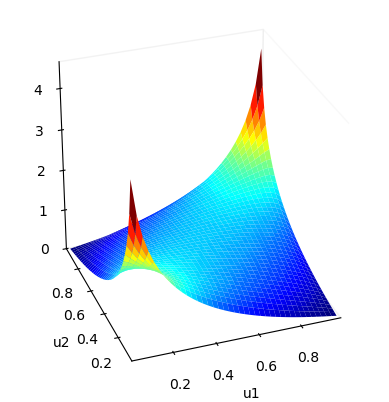

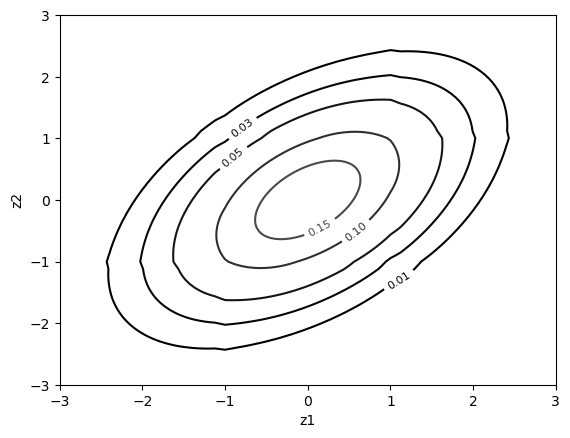

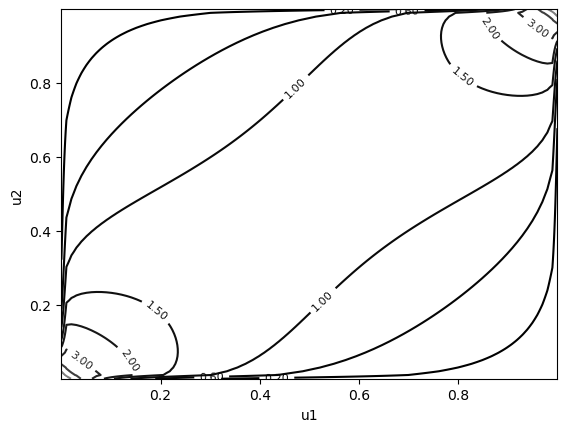

In [3]:
cop = pv.Bicop(family=pv.gaussian, parameters=np.array([[0.5]]))
print(cop)
cop.plot()  # surface plot of copula density
cop.plot(type="contour", margin_type="norm")  # contour plot with normal margins
cop.plot(type="contour", margin_type="unif")  # contour plot of copula density

## Some other families

* A 90 degrees rotated Clayon copula with parameter = 3
* A t copula with correlation of 0.5 and 4 degrees of freedom and showcase some methods

In [4]:
print(pv.Bicop(family=pv.clayton, rotation=90, parameters=np.array([[3.0]])))

cop = pv.Bicop(family=pv.student, parameters=np.array([[0.5], [4]]))
print(cop)
u = cop.simulate(n=10, seeds=[1, 2, 3])
fcts = [
  cop.pdf,
  cop.cdf,
  cop.hfunc1,
  cop.hfunc2,
  cop.hinv1,
  cop.hinv2,
  cop.loglik,
  cop.aic,
  cop.bic,
]
[f(u) for f in fcts]

<pyvinecopulib.Bicop> Bivariate copula: 
  family = Clayton
  rotation = 90
  var_types = c,c
  parameters = 3

<pyvinecopulib.Bicop> Bivariate copula: 
  family = Student
  rotation = 0
  var_types = c,c
  parameters = 0.5
  4



[array([1.28047174, 1.58894473, 1.69217442, 1.40160547, 1.17446536,
        0.96780094, 8.19750257, 1.32347107, 1.66596506, 2.07799487]),
 array([0.2750684 , 0.02106385, 0.07488511, 0.70780857, 0.33949178,
        0.24858048, 0.97062947, 0.63834876, 0.08386428, 0.04462121]),
 array([0.55248667, 0.03952828, 0.36602719, 0.48023317, 0.3370985 ,
        0.19787956, 0.76550606, 0.85523898, 0.24959629, 0.17627362]),
 array([0.37503714, 0.54267378, 0.21210291, 0.89486116, 0.69088997,
        0.76006434, 0.89560217, 0.46993889, 0.3418731 , 0.32312404]),
 array([0.44025059, 0.02898393, 0.11295503, 0.89143942, 0.50405325,
        0.40079956, 0.99794745, 0.85485225, 0.12284869, 0.056674  ]),
 array([0.41647535, 0.02999122, 0.10770379, 0.90572466, 0.55533854,
        0.49348202, 0.99776998, 0.83131508, 0.12656995, 0.05818589]),
 5.327910944678247,
 -6.655821889356494,
 -6.050651703368402]

## Different ways to fit a copula...

In [5]:
u = cop.simulate(n=1000, seeds=[1, 2, 3])

# Create a new object an sets its parameters by fitting afterwards
cop2 = pv.Bicop(pv.student)
cop2.fit(data=u)
print(cop2)

# Otherwise, define first an object to control the fits:
#    - pv.FitControlsBicop objects store the controls
#    - here, we only restrict the parametric family
#    - see help(pv.FitControlsBicop) for more details
# Then, create a copula from the data
controls = pv.FitControlsBicop(family_set=[pv.student])
print(controls)
cop3 = pv.Bicop.from_data(data=u, controls=controls)
print(cop3)

<pyvinecopulib.Bicop> Bivariate copula: 
  family = Student
  rotation = 0
  var_types = c,c
  parameters = 0.48
 3.7

<pyvinecopulib.FitControlsBicop>
Family set: Student
Parametric method: mle
Nonparametric method: constant
Nonparametric multiplier: 1
Weights: no
Selection criterion: bic
Preselect families: yes
mBIC prior probability: 0.9
Number of threads: 1

<pyvinecopulib.Bicop> Bivariate copula: 
  family = Student
  rotation = 0
  var_types = c,c
  parameters = 0.48
 3.7



## Similarly, when the family is unkown, there are two ways to also do model selection...

In [6]:
# Create a new object an selects both its family and parameters afterwards
cop4 = pv.Bicop()
cop4.select(data=u)
print(cop4)

# Or create directly from data
cop5 = pv.Bicop.from_data(data=u)
print(cop5)

<pyvinecopulib.Bicop> Bivariate copula: 
  family = Student
  rotation = 0
  var_types = c,c
  parameters = 0.48
 3.7

<pyvinecopulib.Bicop> Bivariate copula: 
  family = Student
  rotation = 0
  var_types = c,c
  parameters = 0.48
 3.7

